<a href="https://colab.research.google.com/github/jslonpl/Test_Git/blob/main/Histogram_HSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

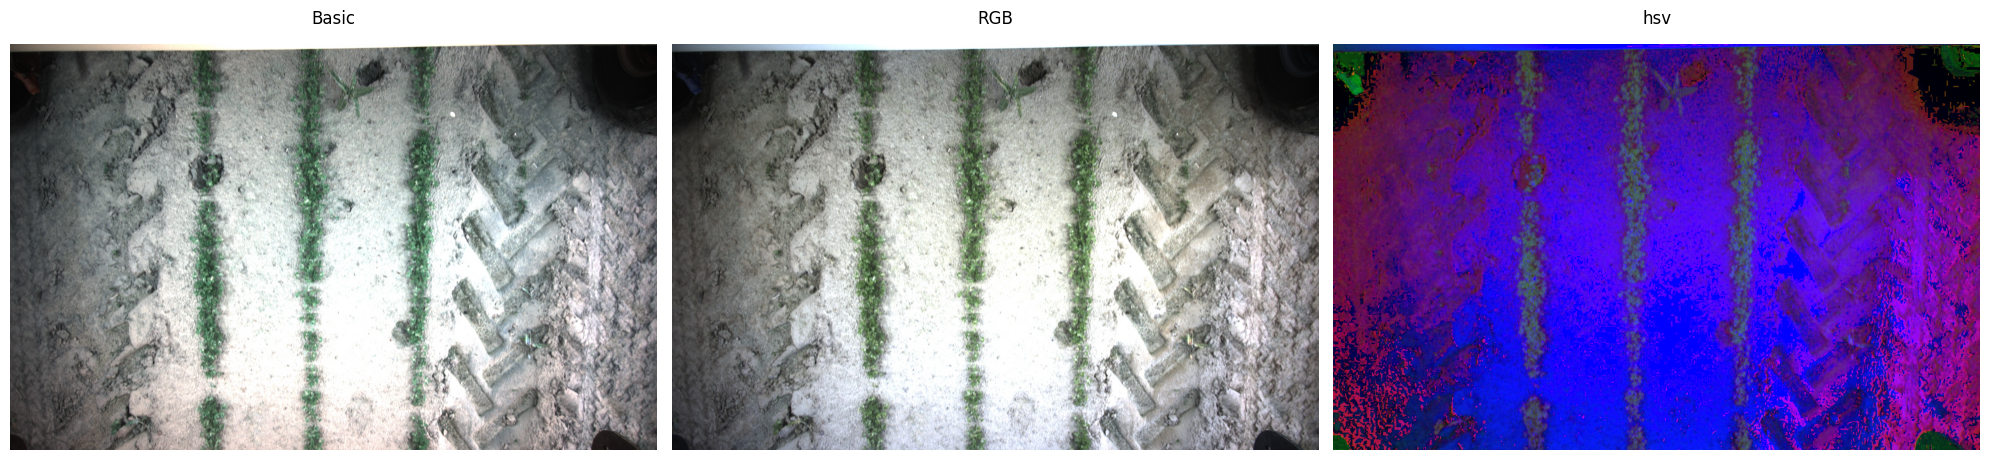

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/5.jpg'

image = cv.imread(img_path)
RGB_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis("off")
plt.text(0.5, 1.05 , "Basic", size=12, ha="center", transform=plt.gca().transAxes)

plt.subplot(1,3,2)
plt.imshow(RGB_image)
plt.axis("off")
plt.text(0.5, 1.05, "RGB", size=12, ha="center", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.imshow(hsv_image)
plt.axis("off")
plt.text(0.5, 1.05, "hsv", size=12, ha="center", transform=plt.gca().transAxes)


plt.tight_layout()
plt.show()

Histogram

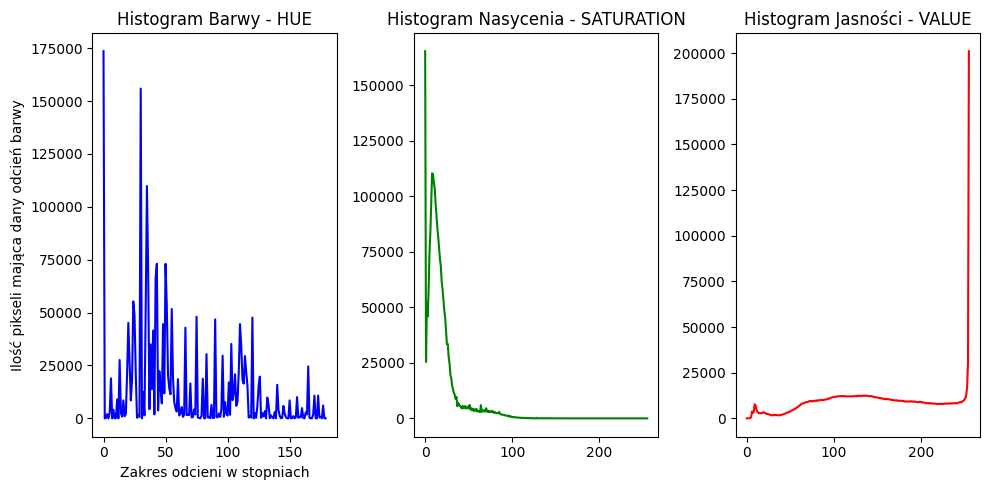

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/5.jpg'

img = cv.imread(img_path)
# kompresja do modelu HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Podział obrazu na składowe HSV
hue, saturation, value = cv.split(hsv_img)

# generacja histogramu dla każdej składowej
hist_hue = cv.calcHist([hue], [0], None, [180], [0, 180])
hist_saturation = cv.calcHist([saturation], [0], None, [256], [0, 256])
hist_value = cv.calcHist([value], [0], None, [256], [0, 256])

# Wyświetlenie histogramu
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(hist_hue, color='b')
plt.title('Histogram Barwy - HUE')
plt.xlabel('Zakres odcieni w stopniach 0-180')
plt.ylabel('Ilość pikseli')


plt.subplot(132)
plt.plot(hist_saturation, color='g')
plt.title('Histogram Nasycenia - SATURATION')
plt.xlabel('Wartość nasycenia 0-100')

plt.subplot(133)
plt.plot(hist_value, color='r')
plt.title('Histogram Jasności - VALUE')
plt.xlabel('Zakres poziomów jasności 0-255')

plt.tight_layout()
plt.show()


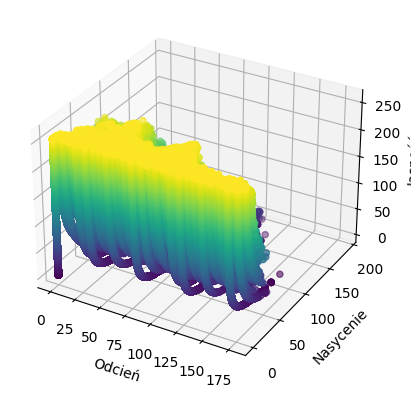

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/5.jpg'

img = cv.imread(img_path)
# kompresja do modelu HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# podział obrazu na składowe HSV
hue, saturation, value = cv.split(hsv_img)

# Stworzenie siatki dla parametrów HSV
h, s = np.meshgrid(np.arange(0,180), np.arange(0, 256))

#Tworzenie trójwymiarowego wykresu
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hue, saturation, value, c=value, cmap='viridis')

#ustawienie etykiet osi
ax.set_xlabel('Odcień')
ax.set_ylabel('Nasycenie')
ax.set_zlabel('Jasność')

plt.show()

In [ ]:
import cv2 as cv
import numpy as np
import plotly.express as px


img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/5.jpg'

img = cv.imread(img_path)
# kompresja do modelu HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# podział obrazu na składowe HSV
hue, saturation, value = cv.split(hsv_img)

#Tworzenie interaktywnego wykres HSV
fig = px.scatter_3d(x=hue.flatten(), y=saturation.flatten(), z=value.flatten(),
                    color=value.flatten(), opacity=0.7, title='Interaktywny wykres 3D')
fig.update_layout(scene=dict(xaxis_title='Odcień', yaxis_title='Nasycenie', zaxis_title='Wartość'))
fig.show()

Szczytowe wartości histogramu:
Odcień: 69
Nasycenie: 8
Wartość: 255


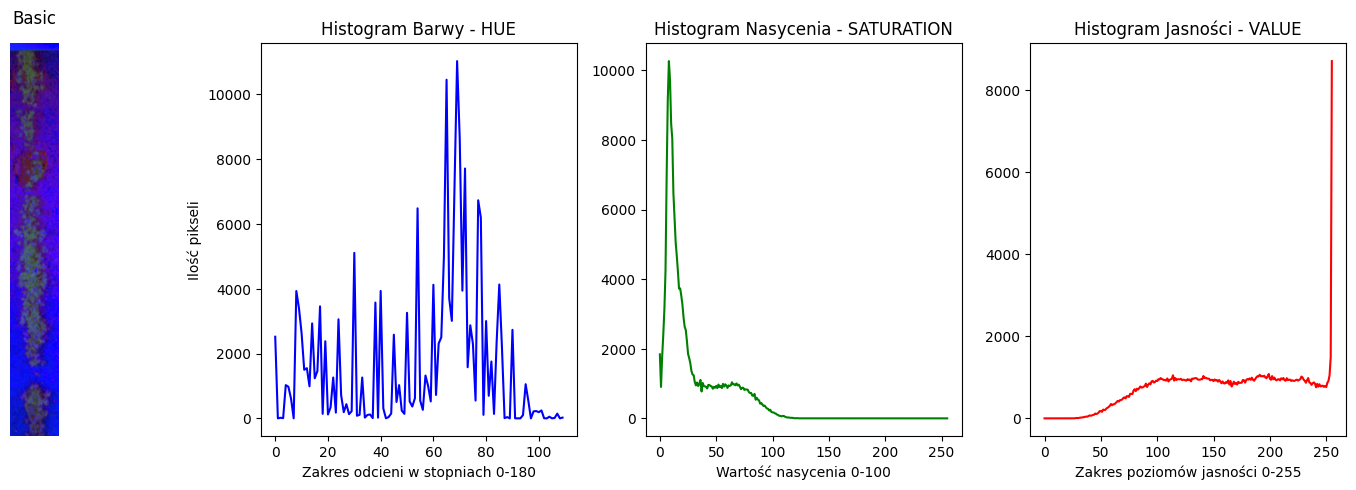

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/5.jpg'

offset = 0
x0, x1 = 525+offset, 675+offset
y0, y1 = 0, 1216

image = cv.imread(img_path)
#h, w, channels = image.shape
#print("Wymiary obrazu: {} x {} pikseli, Liczba kanałów: {}".format(w, h, channels))
#RGB_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
crp_area = hsv_image[y0:y1, x0:x1]

# Podział obrazu na składowe HSV
hue, saturation, value = cv.split(crp_area)

# generacja histogramu dla każdej składowej
hist_hue = cv.calcHist([hue], [0], None, [110], [0, 110])
hist_saturation = cv.calcHist([saturation], [0], None, [256], [0, 256])
hist_value = cv.calcHist([value], [0], None, [256], [0, 256])


# Określenie indeksów szczytowych wartości
peak_hue_index = np.argmax(hist_hue)
peak_saturation_index = np.argmax(hist_saturation)
peak_value_index = np.argmax(hist_value)

# Wartości szczytowe dla każdego parametru
peak_hue_value = peak_hue_index
peak_saturation_value = peak_saturation_index
peak_value_value = peak_value_index

print("Szczytowe wartości histogramu:")
print("Odcień:", peak_hue_value)
print("Nasycenie:", peak_saturation_value)
print("Wartość:", peak_value_value)



plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
plt.imshow(crp_area)
plt.axis("off")
plt.text(0.5, 1.05 , "Basic", size=12, ha="center", transform=plt.gca().transAxes)

# Wyświetlenie histogramu
plt.subplot(1,4,2)
plt.plot(hist_hue, color='b')
plt.title('Histogram Barwy - HUE')
plt.xlabel('Zakres odcieni w stopniach 0-180')
plt.ylabel('Ilość pikseli')


plt.subplot(1,4,3)
plt.plot(hist_saturation, color='g')
plt.title('Histogram Nasycenia - SATURATION')
plt.xlabel('Wartość nasycenia 0-100')

plt.subplot(1,4,4)
plt.plot(hist_value, color='r')
plt.title('Histogram Jasności - VALUE')
plt.xlabel('Zakres poziomów jasności 0-255')

plt.tight_layout()
plt.show()

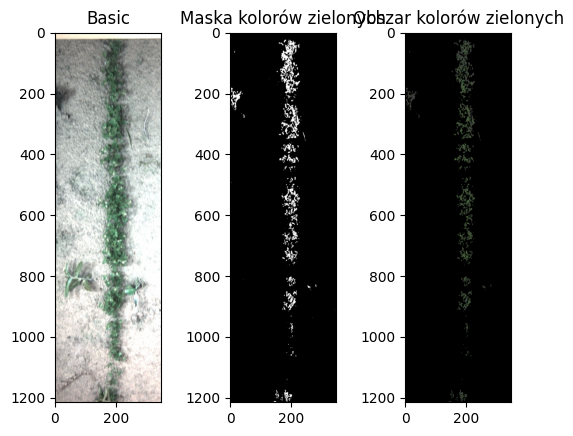

In [ ]:
import cv2 as cv
import numpy
import matplotlib.pyplot as plt

img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/6.jpg'
image = cv.imread(img_path)
offset = 100
x0, x1 = 525-offset, 675+offset
y0, y1 = 0, 1216
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
crp_area = image[y0:y1, x0:x1]

hue, saturation, value = cv.split(crp_area)

# wybór zakresu wartości h dla odcienia zielonego
lower_green = 50
upper_green = 70

# tworzenie maski dla zakresu kolorów zielonych
green_mask = cv.inRange(hue, lower_green, upper_green)

# aplikacja maski na obraz
green_area = cv.bitwise_and(crp_area, crp_area, mask=green_mask)

# wyświetlanie wyników
plt.subplot(131)
plt.imshow(crp_area)
plt.title('Basic')

plt.subplot(132)
plt.imshow(green_mask, cmap='gray')
plt.title('Maska kolorów zielonych')

plt.subplot(133)
plt.imshow(cv.cvtColor(green_area, cv.COLOR_BGR2RGB))
plt.title('Obszar kolorów zielonych')
plt.show()

In [ ]:
from google.colab import widgets
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

# wczytywanie obrazu

img_path = 'drive/MyDrive/Colab Notebooks/clear_line/img/6.jpg'
image = cv.imread(img_path)

# Konwersja z BGR na HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Podział obrazu na składowe HSv
hue, saturation, value = cv.split(hsv_image)

# funkcje interaktywne do eksperymentowania z programi koloru zielonego
@interact(lower_grenn=(0,180), upper_green=(0,180))
def extract_green_area(lower_green=40, upper_green=80):
  # Tworzenie maski dla zakresu kolorów zielonych
  green_mask = cv.inRange(hue, lower_green, upper_green)

  # Aplikacja maski na obraz
  green_area = cv.bitwise_and(image, image, mask=green_mask)

  # Wyświetlanie wyników
  plt.figure(figsize=(10,4))

  plt.subplot(131)
  plt.imshow(image)
  plt.title('Basic')

  plt.subplot(132)
  plt.imshow(green_mask, cmap='gray')
  plt.title('Green mask')

  plt.subplot(133)
  plt.imshow(green_area)
  plt.title('Green Area')

  plt.tight_layout()
  plt.show()

